In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

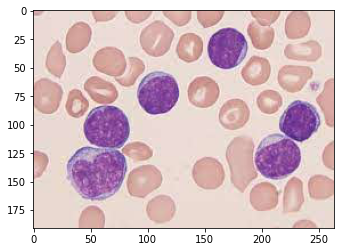

In [3]:
cvimg = cv2.imread('dataset/train/img-1.jpg')
rgbimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)

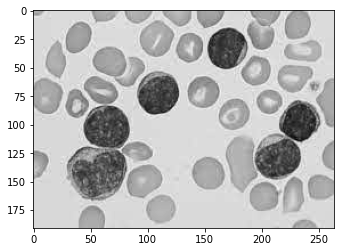

In [4]:
gsimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2GRAY)
plt.imshow(gsimg, 'gray')

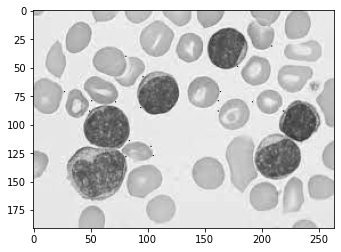

In [5]:
def my_rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))
    img_gray = 0.21*img_rgb[:, :, 0] + 0.77*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')
    return img_gray
scgsimg = my_rgb2gray(rgbimg)
plt.imshow(scgsimg, 'gray')

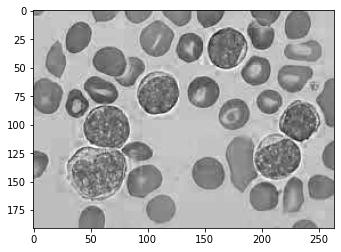

In [6]:
blueimg = cvimg[:,:,0].astype('float64')
blueimg *= (255.0/blueimg.max())
blueimg = blueimg.astype('uint8')
plt.imshow(blueimg, 'gray')

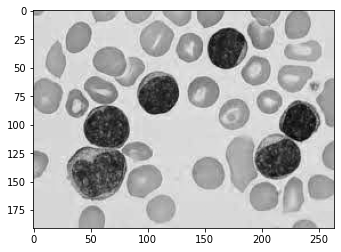

In [7]:
greenimg = cvimg[:,:,1].astype('float64')
greenimg *= (255.0/greenimg.max())
greenimg = greenimg.astype('uint8')
plt.imshow(greenimg, 'gray')

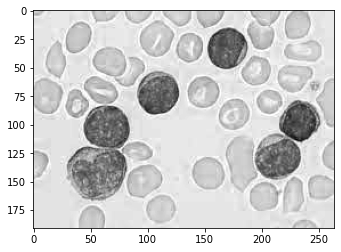

In [8]:
redimg = cvimg[:,:,2].astype('float64')
redimg *= (255.0/redimg.max())
redimg = redimg.astype('uint8')
plt.imshow(redimg, 'gray')

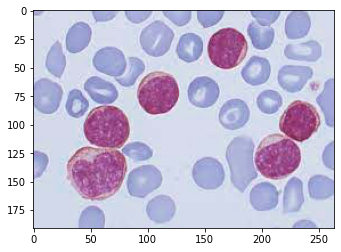

In [9]:
plt.imshow(cvimg)

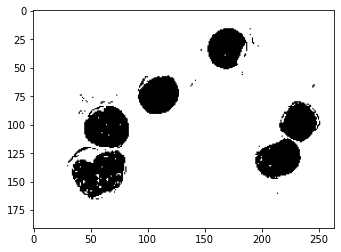

In [10]:
_, bingreenimg = cv2.threshold(greenimg, 127, 255, cv2.THRESH_BINARY)
plt.imshow(bingreenimg, 'gray')

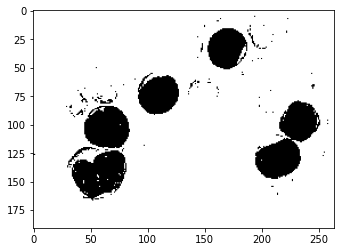

In [11]:
adabingreenimg = cv2.adaptiveThreshold(greenimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 64)
plt.imshow(adabingreenimg, 'gray')

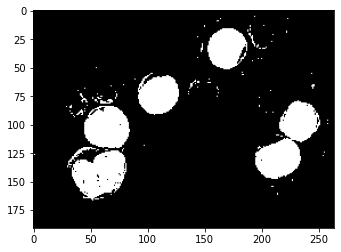

In [12]:
invadabingreenimg = 255-adabingreenimg
plt.imshow(invadabingreenimg, 'gray')

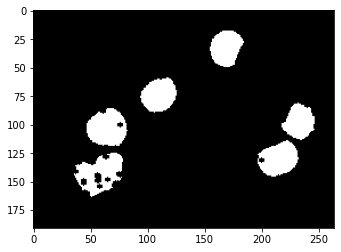

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
erodedinvadabingreenimg = cv2.erode(invadabingreenimg, kernel, iterations=1)
plt.imshow(erodedinvadabingreenimg, 'gray')

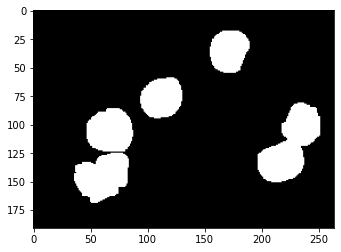

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilatederodedinvadabingreenimg = cv2.dilate(erodedinvadabingreenimg, kernel, iterations=5)
plt.imshow(dilatederodedinvadabingreenimg, 'gray')

In [15]:
img, contours, hierarchy = cv2.findContours(dilatederodedinvadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

5


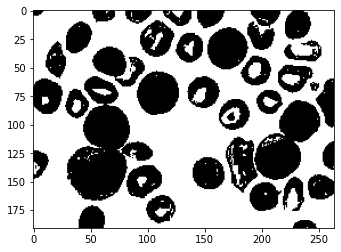

In [16]:
_, bingsimg = cv2.threshold(gsimg, 192, 255, cv2.THRESH_BINARY)
plt.imshow(bingsimg, 'gray')

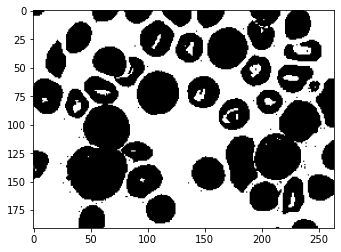

In [17]:
adabingsimg = cv2.adaptiveThreshold(gsimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 0)
plt.imshow(adabingsimg, 'gray')

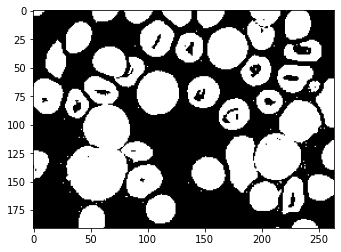

In [18]:
invadabingsimg = 255 - adabingsimg
plt.imshow(invadabingsimg, 'gray')

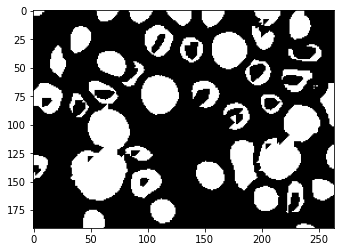

In [19]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
erodedinvadabingsimg = cv2.erode(invadabingsimg, kernel, iterations=4)
plt.imshow(erodedinvadabingsimg, 'gray')

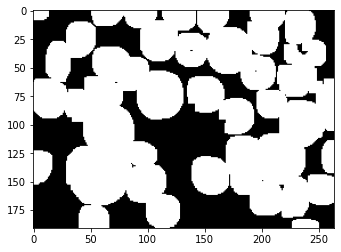

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilatederodedinvadabingsimg = cv2.dilate(erodedinvadabingsimg, kernel, iterations=4)
plt.imshow(dilatederodedinvadabingsimg, 'gray')

In [21]:
img, contours, hierarchy = cv2.findContours(dilatederodedinvadabingsimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

20
